In [85]:
# Import libraries
import pandas as pd
import numpy as np
import ast
import re
import math
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
!conda install -c conda-forge folium=0.10.1 --yes
from folium.plugins import FloatImage
import folium # plotting library

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [86]:
# Plotly
!pip install plotly==4.1.1
!pip install chart-studio
import plotly
from plotly.offline import *
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

In [87]:
rest_df = pd.read_csv(r'C:\Users\Klsingh\Desktop\zomato_res.csv', engine ='python', encoding ='utf-8')

In [88]:
rest_df.head()

,Cost_for_two,Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Competitors_in_Location,Score
0,1500,"Finger Food, Continental, European, Italian","Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,4.9,1326,Excellent,True,4,19.0,48.000806
1,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,True,4.6,5974,Excellent,True,1,209.0,71.950295
2,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",True,4.5,1438,Excellent,False,1,241.0,43.160370
3,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",True,4.9,3275,Excellent,True,2,125.0,59.778427
4,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,True,4.1,1422,Very Good,False,4,116.0,37.546442


#### Lets drop the null values

In [89]:
rest_df.dropna(subset = ["Features"], inplace=True)
rest_df.dropna(subset = ["Restaurant_Type"], inplace=True)
rest_df.dropna(subset = ["Restaurant_Location"], inplace=True)

In [90]:
rest_df.head()

,Cost_for_two,Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Competitors_in_Location,Score
0,1500,"Finger Food, Continental, European, Italian","Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,4.9,1326,Excellent,True,4,19.0,48.000806
1,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,True,4.6,5974,Excellent,True,1,209.0,71.950295
2,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",True,4.5,1438,Excellent,False,1,241.0,43.160370
3,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",True,4.9,3275,Excellent,True,2,125.0,59.778427
5,1600,"Modern Indian, European, Pizza, Grill","Best of Mumbai, Food Hygiene Rated Restaurants...",False,1pm – 1am (Mon-Sun),Bandra West,JLWA,"Casual Dining,Bar",True,4.8,1989,Excellent,True,4,241.0,50.627941


### Exploratory Data Analysis

##### How many different restaurants are there in Mumbai

In [91]:
histo = rest_df.groupby('Restaurant_Name')['Restaurant_Location'].count()
# Lets take the top 50 restaurantsand plot bar graph
histo = histo.sort_values()[-50:]

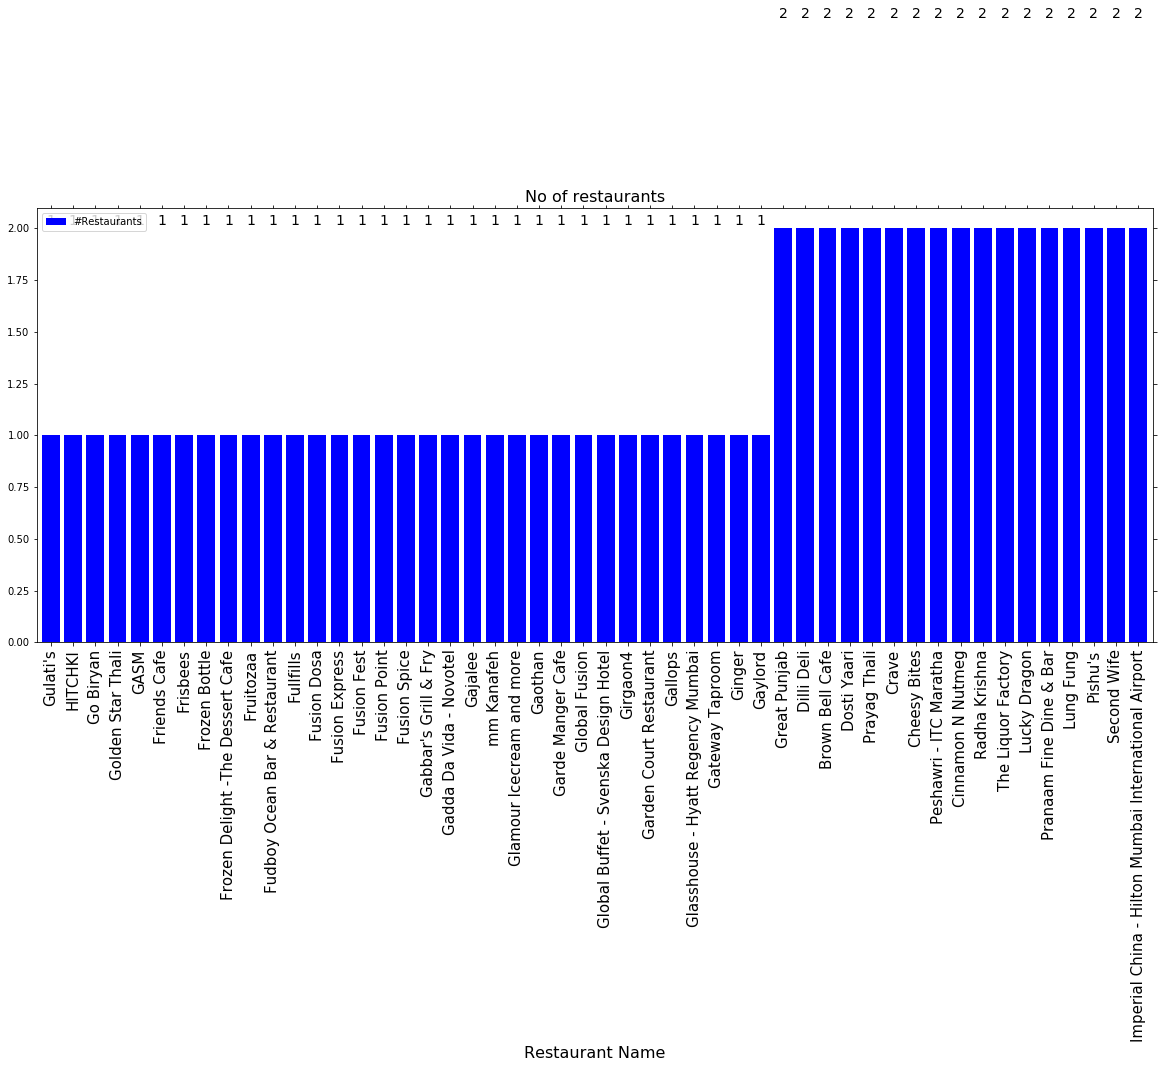

In [92]:
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Restaurant Name', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

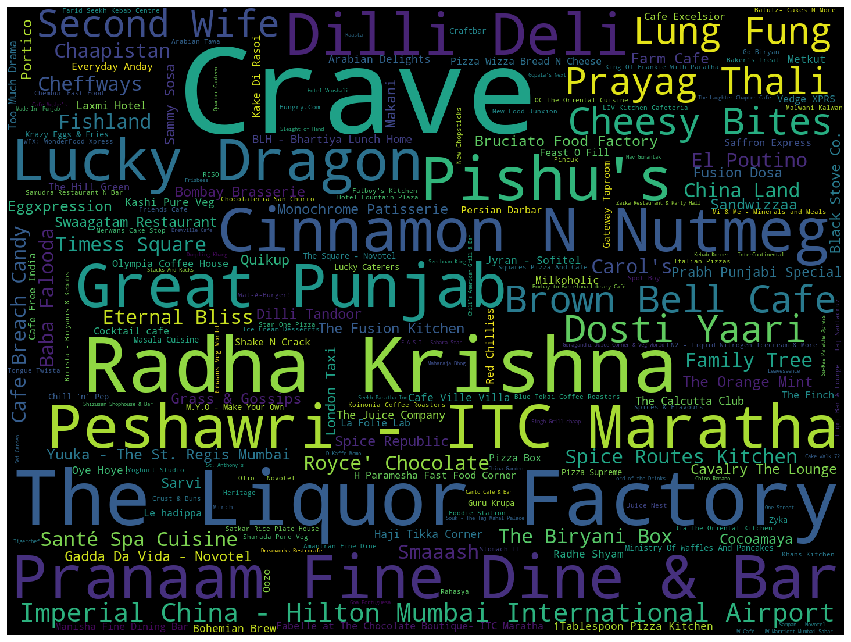

In [93]:
!pip install wordcloud
from subprocess import check_output
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(rest_df['Restaurant_Name'].value_counts()))
fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### It shows Crave has the most number of restaurants in Mumbai, followed by Radha Krishna

### Lets check Home Delivery service provided by restaurants

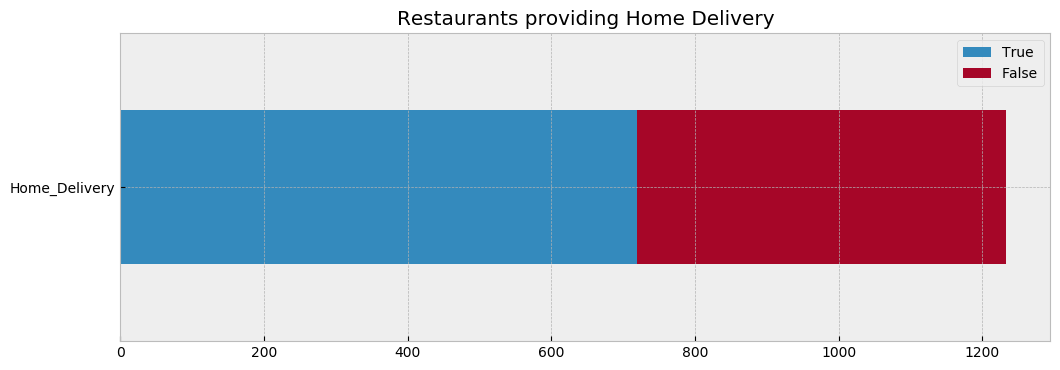

In [94]:
with plt.style.context('bmh', after_reset = True):
    plt.figure(figsize = (12,4))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['Home_Delivery']: 
        tmp[col] = rest_df[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)
    ax.set_title('Restaurants providing Home Delivery')
    plt.show()

### Let's consider rating of restaurants and find the average rating for each of the neighborhood

In [95]:
rest_df.Rating = rest_df.Rating.astype(str)
rest_df['Rating'] = rest_df['Rating'].str.split('/').str[0]

Lets set the rating of new restaurants as NULL

In [96]:
rest_df.loc[rest_df['Rating']=="NEW", 'Rating'] = np.nan
rest_df.loc[rest_df['Rating']=="-", 'Rating'] = np.nan

In [97]:
rest_df['Rating'] = rest_df['Rating'].astype('float')

In [98]:
rest_df.groupby(['Restaurant_Location'])['Rating'].mean().sort_values()[-50:][:-1]

Restaurant_Location
Vile Parle West          3.916667
Ghatkopar East           3.916667
Thane West               3.931169
Worli                    3.940000
Borivali West            3.941379
Goregaon West            3.946154
Marol                    3.950000
Grant Road               3.950000
Marine Lines             3.975000
Chakala                  3.982143
Nariman Point            3.987500
Bhayandar                4.000000
Wadala                   4.000000
Byculla                  4.000000
Andheri West             4.002198
Lower Parel              4.002632
Chowpatty                4.010000
Charni Road              4.011111
Sakinaka                 4.020000
Dadar West               4.028571
Andheri                  4.033333
Khar                     4.042857
4 Bungalows              4.045455
Mahim                    4.050000
Ghatkopar West           4.066667
Dahisar West             4.071429
Mahalaxmi                4.075000
Ghodbunder Road          4.075000
Kemps Corner             4.1

##### It clearly shows that Kalwa area restaurants are highly rated followed by Bandra Kurla Complex and Kamala Mills Compound

### Number of restaurants in each Neighborhood

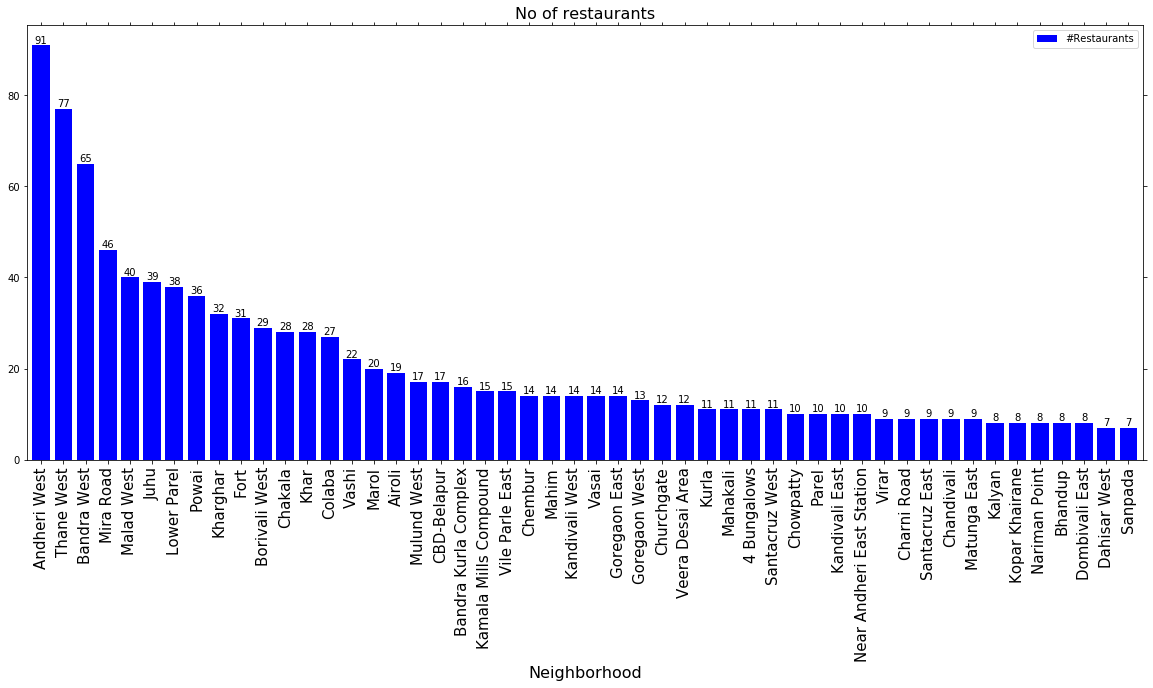

In [99]:
histo = rest_df.groupby('Restaurant_Location')['Cost_for_two'].count().sort_values(ascending=False)[:50]
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

##### Above plot shows Andheri West has the highest number of restaurants followed by Thane West

### Zomato's Presence across Mumbai

In [100]:
labels = list(rest_df.Restaurant_Location.value_counts().index)
values = list(rest_df.Restaurant_Location.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
            
        },
    ],
    "layout": {
        "title" : "Zomato's Presence in Mumbai",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Neighborhood",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
plotly.offline.plot(fig)

'temp-plot.html'

### Lets get the coordinates for each of the neighborhood

In [101]:
location = [x for x in rest_df['Restaurant_Location'].unique().tolist() 
            if type(x) == str]
latitude = []
longitude =  []
for i in range(0, len(location)):
    
    try:
        address = location[i] + ', Mumbai, India'
        geolocator = Nominatim(user_agent="ny_explorer")
        loc = geolocator.geocode(address)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
        
    except:
        # in the case the geolocator does not work, then add nan element to list
        # to keep the right size
        latitude.append(np.nan)
        longitude.append(np.nan)
# create a dataframe with the location, latitude and longitude
df_ = pd.DataFrame({'Restaurant_Location':location, 
                    'location_latitude': latitude,
                    'location_longitude':longitude})
# merge on Restaurant_Location with rest_df to get the column 
new_df = rest_df.merge(df_, on='Restaurant_Location', how='left')

In [103]:
new_df.head()

,Cost_for_two,Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Competitors_in_Location,Score,location_latitude,location_longitude
0,1500,"Finger Food, Continental, European, Italian","Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,4.9,1326,Excellent,True,4,19.0,48.000806,NaN,NaN
1,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,True,4.6,5974,Excellent,True,1,209.0,71.950295,19.184013,72.841216
2,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",True,4.5,1438,Excellent,False,1,241.0,43.160370,19.058336,72.830267
3,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",True,4.9,3275,Excellent,True,2,125.0,59.778427,18.996332,72.830860
4,1600,"Modern Indian, European, Pizza, Grill","Best of Mumbai, Food Hygiene Rated Restaurants...",False,1pm – 1am (Mon-Sun),Bandra West,JLWA,"Casual Dining,Bar",True,4.8,1989,Excellent,True,4,241.0,50.627941,19.058336,72.830267


In [104]:
new_df.infer_objects().dtypes

Cost_for_two                    int64
Cuisines                       object
Features                       object
Home_Delivery                    bool
Operational_hours              object
Restaurant_Location            object
Restaurant_Name                object
Restaurant_Type                object
View_Menu                        bool
Rating                        float64
Votes                           int64
Rating_Category                object
Operational_after_Midnight       bool
Cuisine_count                   int64
Competitors_in_Location       float64
Score                         float64
location_latitude             float64
location_longitude            float64
dtype: object

In [105]:
new_df.dropna(subset = ['Restaurant_Location'], inplace=True)
new_df.dropna(subset = ['location_latitude'], inplace=True)
new_df.dropna(subset = ['location_longitude'], inplace=True)
new_df.head()

,Cost_for_two,Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Competitors_in_Location,Score,location_latitude,location_longitude
1,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,True,4.6,5974,Excellent,True,1,209.0,71.950295,19.184013,72.841216
2,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",True,4.5,1438,Excellent,False,1,241.0,43.160370,19.058336,72.830267
3,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",True,4.9,3275,Excellent,True,2,125.0,59.778427,18.996332,72.830860
4,1600,"Modern Indian, European, Pizza, Grill","Best of Mumbai, Food Hygiene Rated Restaurants...",False,1pm – 1am (Mon-Sun),Bandra West,JLWA,"Casual Dining,Bar",True,4.8,1989,Excellent,True,4,241.0,50.627941,19.058336,72.830267
5,1200,Modern Indian,Best of Mumbai,True,12noon – 1:30am (Mon-Sun),Bandra Kurla Complex,HITCHKI,"Casual Dining,Bar",True,4.7,2640,Excellent,True,1,38.0,53.182562,19.067115,72.865724


In [106]:
new_df['location_latitude'] = new_df['Restaurant_Location'].map(dict(zip(location, latitude)))
new_df['location_longitude'] = new_df['Restaurant_Location'].map(dict(zip(location, longitude)))

In [107]:
dataframe_filtered = new_df.groupby(['Restaurant_Location'])['location_latitude', 'location_longitude'].first()
dataframe_filtered['no_restaurant'] = new_df.groupby(['Restaurant_Location'])['Cost_for_two'].count()
venues_map = folium.Map(location=[19.076090, 72.877426], zoom_start=11) # generate map centred around Mumbai
states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip (dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
i=0
for lat, lng, in zip (dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.Marker(
            [lat, lng],
            popup= dataframe_filtered.index[i],
        )
    )
    i+=1
venues_map.add_child(states)
venues_map

C:\Users\Klsingh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### Neighborhood by rating

In [113]:
nb_rate_df = new_df.groupby(['Restaurant_Location'])['location_latitude', 'location_longitude'].first()
nb_rate_df['Rating'] = new_df.groupby(['Restaurant_Location'])['Rating'].mean()
nb_rate_df

C:\Users\Klsingh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,location_latitude,location_longitude,Rating
Restaurant_Location,,,
4 Bungalows,18.938771,72.835335,4.045455
Airoli,19.151749,72.974477,3.715789
Andheri,19.119698,72.846420,4.033333
Andheri East,19.115883,72.854202,3.900000
Andheri West,19.117249,72.833968,4.002198
...,...,...,...
Vile Parle East,19.096288,72.848380,4.120000
Vile Parle West,19.103873,72.840290,3.916667
Virar,19.467682,72.887997,3.766667


### **Neighborhood by cost of food**

#### Lets see the cost of food in each neighborhood of Mumbai

In [117]:
new_df['Cost_for_two'] = new_df['Cost_for_two'].astype(str).str.replace(",","").astype(float)

In [118]:
above_50 = new_df.groupby('Restaurant_Location')['Cost_for_two'].count()[new_df.groupby('Restaurant_Location')['Cost_for_two'].count() >= 10].index

In [119]:
new_df[new_df['Restaurant_Location'].isin(above_50)].groupby('Restaurant_Location')['Cost_for_two'].mean().sort_values(ascending= False)


Restaurant_Location
Vile Parle East              3713.333333
Chakala                      2887.500000
Bandra Kurla Complex         2281.250000
Juhu                         1852.564103
Colaba                       1829.629630
Churchgate                   1783.333333
Lower Parel                  1532.368421
Parel                        1295.000000
Powai                        1259.722222
Veera Desai Area             1225.000000
Goregaon East                1142.857143
Khar                         1112.500000
Bandra West                  1098.461538
Fort                         1020.967742
Goregaon West                 984.615385
Marol                         970.000000
Kurla                         940.909091
CBD-Belapur                   879.411765
Santacruz West                836.363636
Vashi                         831.818182
Mahim                         803.571429
Chowpatty                     780.000000
Mahakali                      740.909091
Andheri West                  730.769

From above results we can figure-out that cost of living in Vile Parle East quite high

### Lets visualize it on the map

In [120]:
nb_cost_df = new_df.groupby(['Restaurant_Location'])['location_latitude', 'location_longitude'].first()
nb_cost_df['cost'] = new_df.groupby(['Restaurant_Location'])['Cost_for_two'].mean()
nb_cost_df

C:\Users\Klsingh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,location_latitude,location_longitude,cost
Restaurant_Location,,,
4 Bungalows,18.938771,72.835335,586.363636
Airoli,19.151749,72.974477,578.947368
Andheri,19.119698,72.846420,4000.000000
Andheri East,19.115883,72.854202,2000.000000
Andheri West,19.117249,72.833968,730.769231
...,...,...,...
Vile Parle East,19.096288,72.848380,3713.333333
Vile Parle West,19.103873,72.840290,658.333333
Virar,19.467682,72.887997,561.111111


In [121]:
bins = pd.IntervalIndex.from_tuples([(200, 600), (601, 1000), (1001, 1400), (2201, 2600), (2601, 3000), (3001, 3700)])
nb_cost_df['category'] = pd.cut(nb_cost_df['cost'], bins)

In [122]:
x = nb_cost_df.groupby('category').groups.keys()
venues_map = folium.Map(location=[19.076090, 72.877426], zoom_start=11) # generate map centred around Mumbai

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(nb_cost_df.location_latitude, nb_cost_df.location_longitude):
    states.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']
j=0
for i in range(0,len(list(x))):
    group = nb_cost_df.groupby('category').get_group(list(x)[i])
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)

# url = ('https://raw.githubusercontent.com/SECOORA/static_assets/'
#        'master/maps/img/rose.png')
# FloatImage(image_file, bottom=40, left=65).add_to(venues_map)
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Cost</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>200-600</li>
    <li><span style='background:blue;opacity:0.7;'></span>601-1000</li>
    <li><span style='background:green;opacity:0.7;'></span>1001-1400</li>
    <li><span style='background:purple;opacity:0.7;'></span>2201-2600</li>
  </ul>
</div>
</div>
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

venues_map.get_root().add_child(macro)

venues_map

It can be seen that most of the costly restaurants are located in western,central and south Mumbai areas like - Vile Parle East, Chakala, Bandra Kurla Complex, Juhu, Colaba and Churchgate.

### Grouping the neighborhood by the type of restaurant

In [123]:
types = set()
def func(x):
    if(type(x) == list):
        print(x)
        for y in x:
            types.add(y.strip())
_ = new_df['Restaurant_Type'].str.split(',').apply(func)

['Quick Bites']
['Casual Dining', 'Bar']
['Lounge', 'Bar']
['Casual Dining', 'Bar']
['Casual Dining', 'Bar']
['Fine Dining']
['Fine Dining']
['Casual Dining']
['Bar', 'Casual Dining']
['Bar', 'Casual Dining']
['Casual Dining', 'Lounge']
['Casual Dining']
['Casual Dining', 'Bar']
['Bar', 'Lounge']
['Lounge']
['Café']
['Pub', 'Casual Dining']
['Bar', 'Casual Dining']
['Casual Dining']
['Bar', 'Casual Dining']
['Bar']
['Fine Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining', 'Bar']
['Casual Dining']
['Fine Dining']
['Casual Dining', 'Bar']
['Casual Dining']
['Microbrewery', 'Bar']
['Bar']
['Dessert Parlor']
['Pub', 'Café']
['Lounge', 'Bar']
['Casual Dining', 'Bar']
['Casual Dining', 'Bar']
['Casual Dining']
['Quick Bites']
['Lounge']
['Casual Dining']
['Fine Dining', 'Lounge']
['Fine Dining']
['Bakery']
['Casual Dining', 'Bar']
['Fine Dining']
['Pub']
['Bar', 'Casual Dining']
['Fine Dining']
['Casual Dining', 'Bar']
['Lounge', 'Bar']
['Casua

In [124]:
column_names = list(types)
# instantiate the dataframe
neighborhood = pd.DataFrame(columns=column_names)
neighborhood

,Food Truck,Food Court,Bar,Confectionery,Café,Beverage Shop,Fine Dining,Lounge,Dessert Parlor,Sweet Shop,Cocktail Bar,Microbrewery,Quick Bites,Pub,Bakery,Club,Kiosk,Casual Dining


In [138]:
neighborhood['neighborhood'] = new_df.groupby('Restaurant_Location').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood

,Food Truck,Food Court,Bar,Confectionery,Café,Beverage Shop,Fine Dining,Lounge,Dessert Parlor,Sweet Shop,Cocktail Bar,Microbrewery,Quick Bites,Pub,Bakery,Club,Kiosk,Casual Dining
neighborhood,,,,,,,,,,,,,,,,,,
4 Bungalows,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Airoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andheri East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andheri West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vile Parle East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Vile Parle West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Virar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
print(new_df.index)

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,   10,   11,
            ...
            1222, 1223, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232],
           dtype='int64', length=1173)


In [127]:
print (new_df.columns.get_loc('Restaurant_Type'))
print (new_df.columns.get_loc('Restaurant_Location'))

7
5


In [142]:
i=1
for i in range(1,len(new_df)):
    for x in types:
        if type(new_df.iloc[:, 7]) == str and x in new_df.iloc[:, 7]:
            neighborhood.iloc[new_df.iloc[:, 5], x] = neighborhood.iloc[new_df.iloc[:, 5], x]+1

In [143]:
neighborhood

,Food Truck,Food Court,Bar,Confectionery,Café,Beverage Shop,Fine Dining,Lounge,Dessert Parlor,Sweet Shop,Cocktail Bar,Microbrewery,Quick Bites,Pub,Bakery,Club,Kiosk,Casual Dining
neighborhood,,,,,,,,,,,,,,,,,,
4 Bungalows,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Airoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andheri East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andheri West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vile Parle East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Vile Parle West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Virar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
dfs = neighborhood.reset_index().melt('neighborhood', var_name='cols',  value_name='vals')

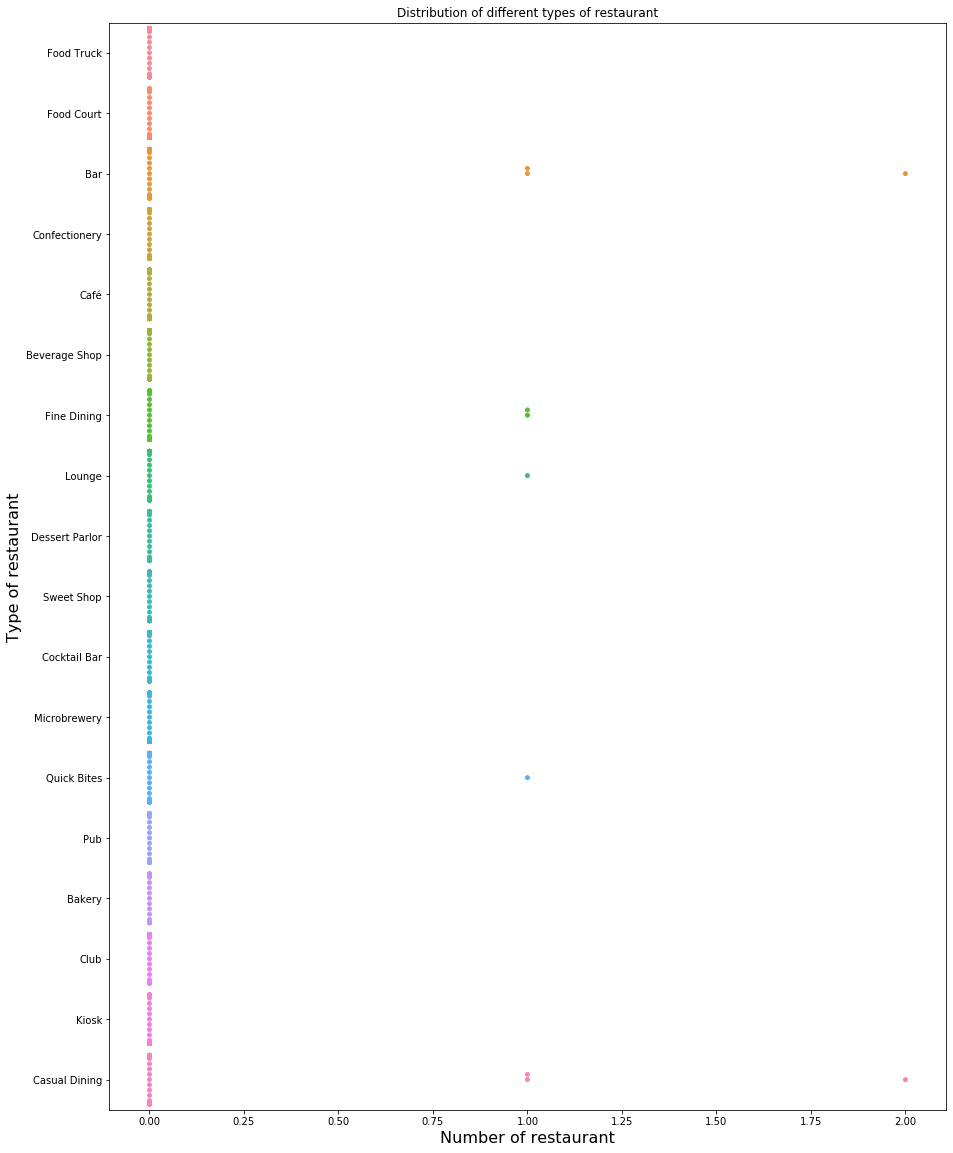

In [145]:
plt.figure(figsize=(15,20))
ax = sns.swarmplot(x="vals", y="cols", data=dfs)
ax.set_xlabel('Number of restaurant', fontsize=16)
ax.set_ylabel('Type of restaurant', fontsize=16)
ax.set_title('Distribution of different types of restaurant')
plt.savefig("swarm.png")

### **Grouping the neighborhood by the cuisines**

Lets check whether there is any neighborhood that is more famous for its cuisines

In [150]:
types = set()
def func(x):
    if(type(x) == list):
        for y in x:
            types.add(y.strip())
_ = new_df['Cuisines'].str.split(',').apply(func)

In [151]:
column_names = list(types)
# instantiate the dataframe
neighborhood_cns = pd.DataFrame(columns=column_names)
neighborhood_cns

,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,BBQ,Cantonese,Mithai,Greek,...,Korean,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani


In [174]:
neighborhood_cns['neighborhood'] = rest_df.groupby('Restaurant_Location').groups.keys()
neighborhood_cns = neighborhood_cns.set_index('neighborhood').fillna(0)
neighborhood_cns

,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,BBQ,Cantonese,Mithai,Greek,...,Korean,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani
neighborhood,,,,,,,,,,,,,,,,,,,,,
4 Bungalows,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Airoli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alibaug,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andheri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andheri East,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vile Parle East,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vile Parle West,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Virar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
print (new_df.columns.get_loc('Cuisines'))

1


In [176]:
i=1
for i in range(1,len(new_df)):
    for x in types:
        if type(new_df.loc[:, 'Cuisines']) == str and x in new_df.loc[:, 'Cuisines']:
            neighborhood_cns.loc[new_df.loc[:, 'Restaurant_Location'], x] = neighborhood_cns.loc[new_df.loc[:, 'Restaurant_Location'], x]+1

In [177]:
neighborhood_cns

,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,BBQ,Cantonese,Mithai,Greek,...,Korean,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani
neighborhood,,,,,,,,,,,,,,,,,,,,,
4 Bungalows,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Airoli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alibaug,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andheri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andheri East,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vile Parle East,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vile Parle West,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Virar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


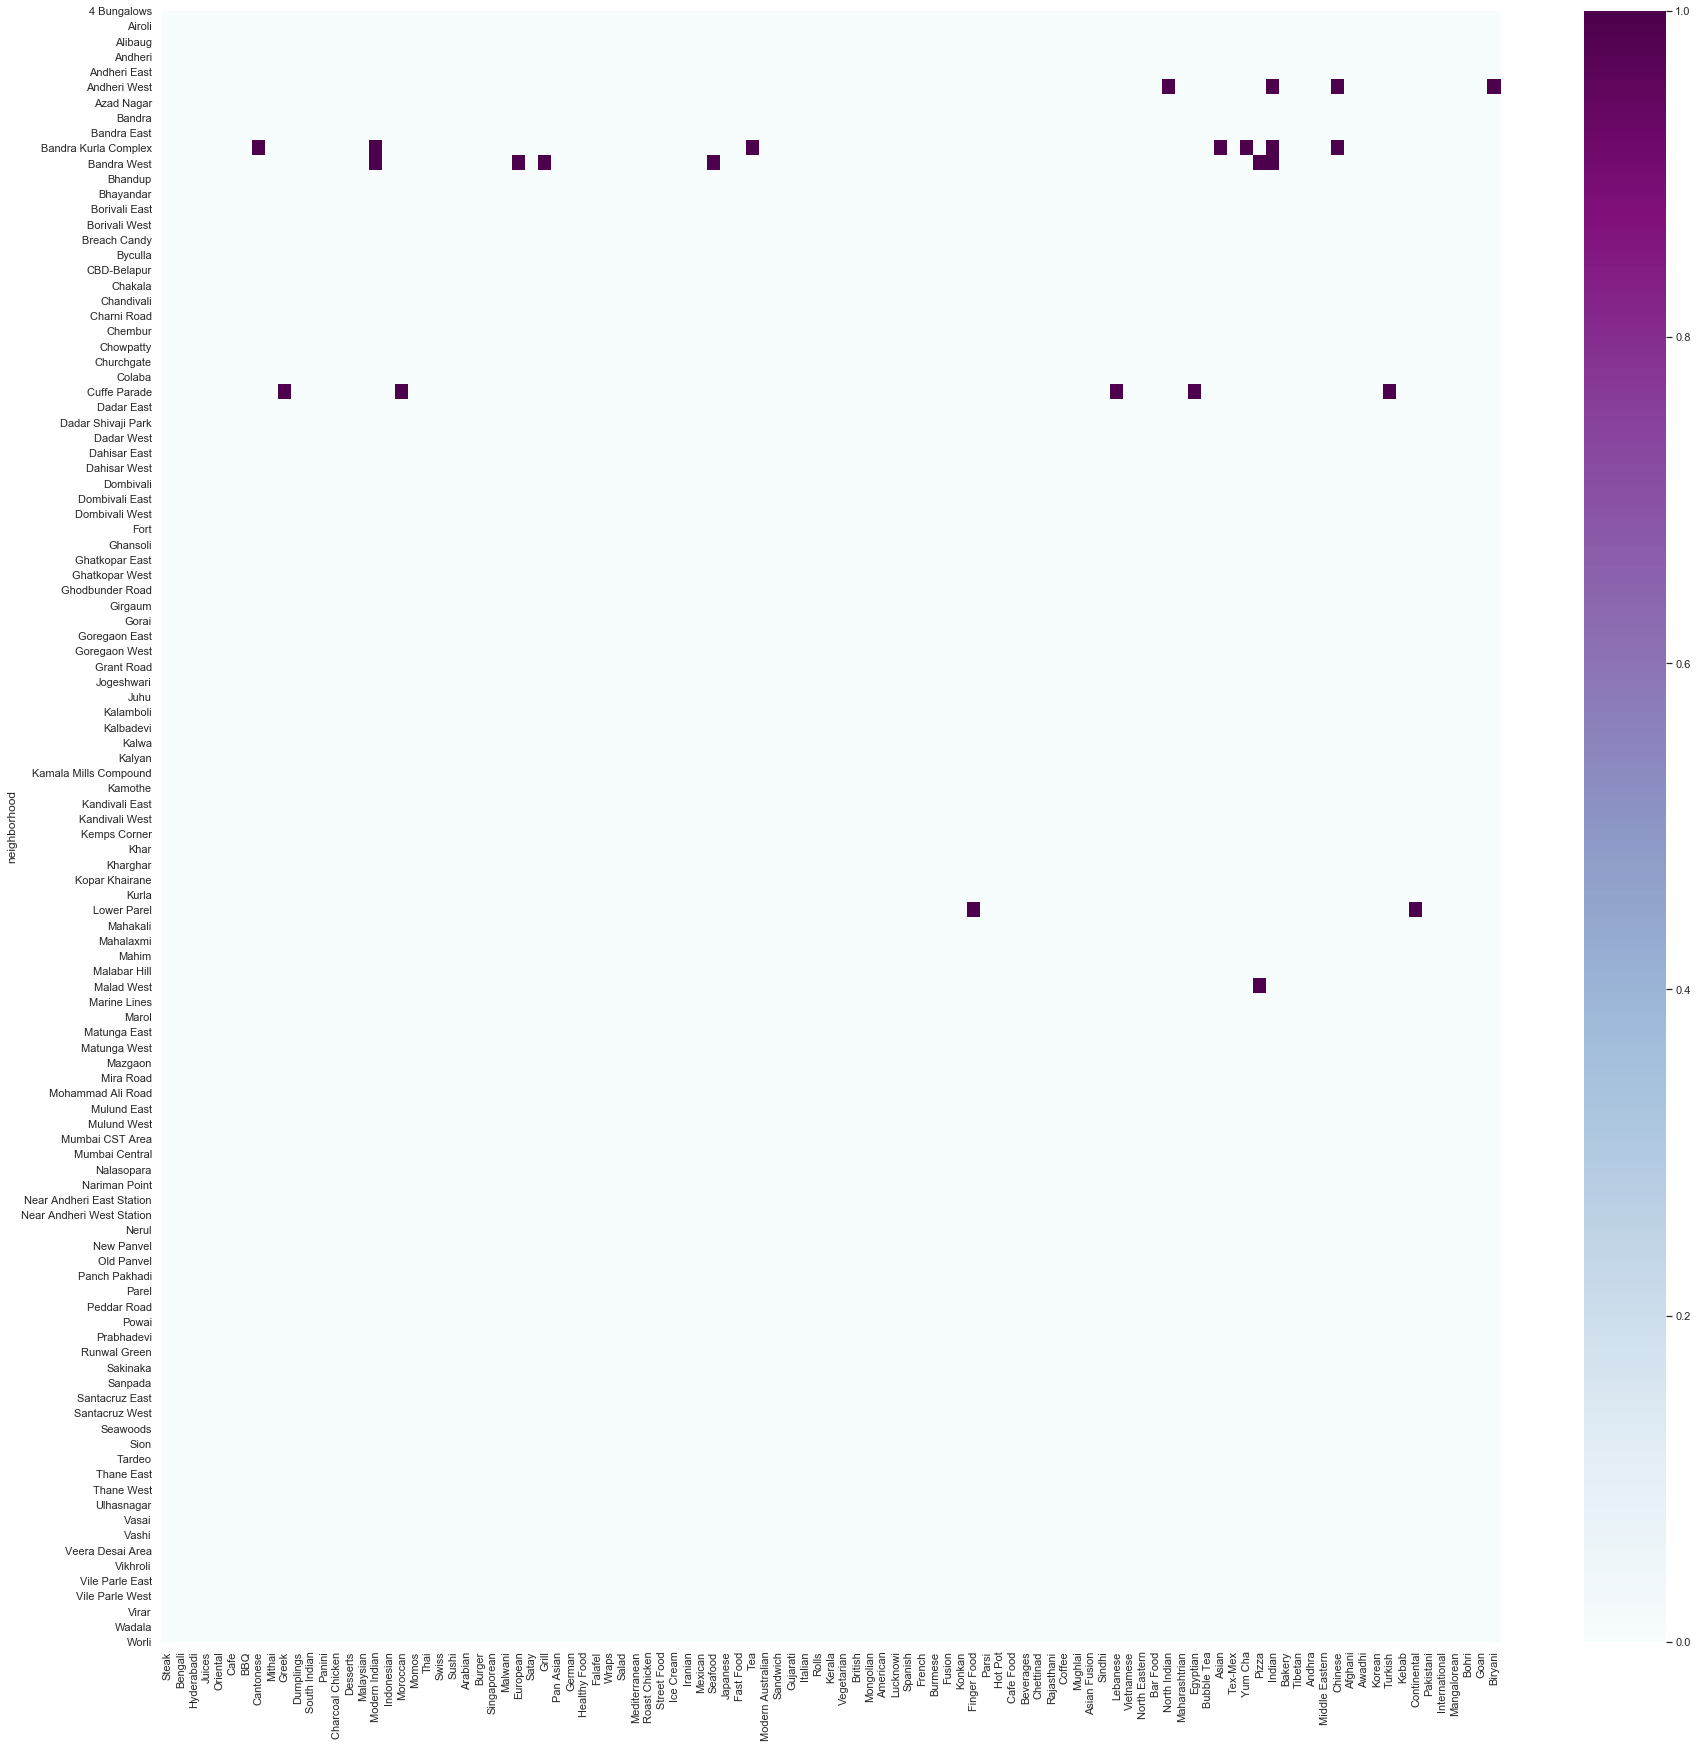

In [178]:
import matplotlib.colors as colors
plt.figure(figsize=(30,30))
sns.heatmap(neighborhood_cns,cmap="BuPu")

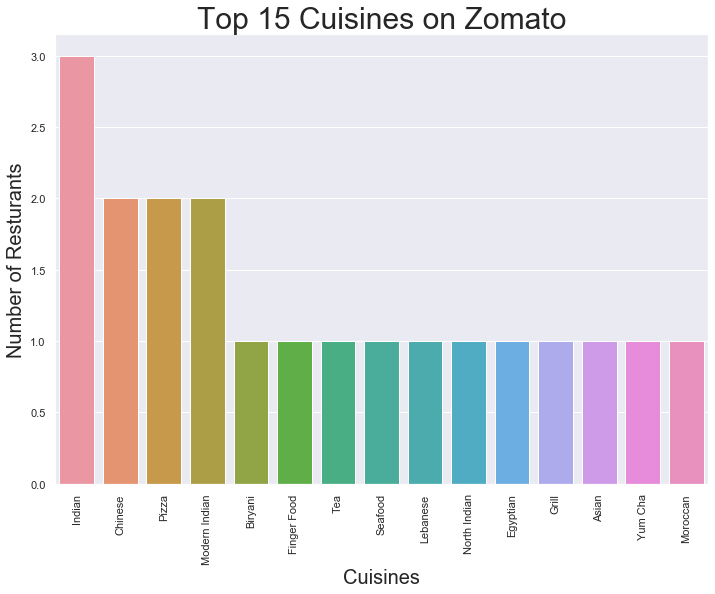

In [179]:
Cuisine_data = pd.DataFrame(neighborhood_cns.sum(axis=0))
Cuisine_data.reset_index(inplace=True)
Cuisine_data.columns = ['Cuisines', 'Number of Resturants']
Top15= (Cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(15)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top15['Cuisines'], Top15['Number of Resturants'])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 15 Cuisines on Zomato', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

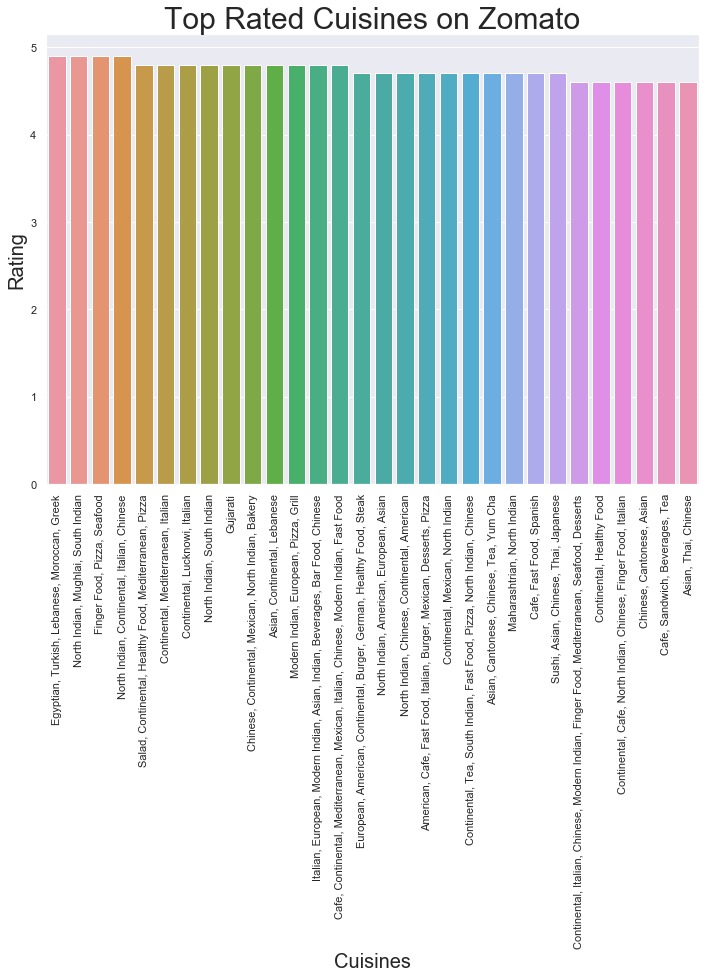

In [180]:
Cuisine_data_rating=(new_df.groupby(['Cuisines'], as_index=False)['Rating'].mean())
Cuisine_data_rating.columns = ['Cuisines', 'Rating']
Top30_ratings= (Cuisine_data_rating.sort_values(['Rating'],ascending=False)).head(30)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top30_ratings['Cuisines'], Top30_ratings['Rating'])
plt.title('Top Rated Cuisines on Zomato', fontsize=30)
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Rating', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

### **Rating**

#### Restaurant rating Normal Distribution

Text(0, 0.5, 'Flights')

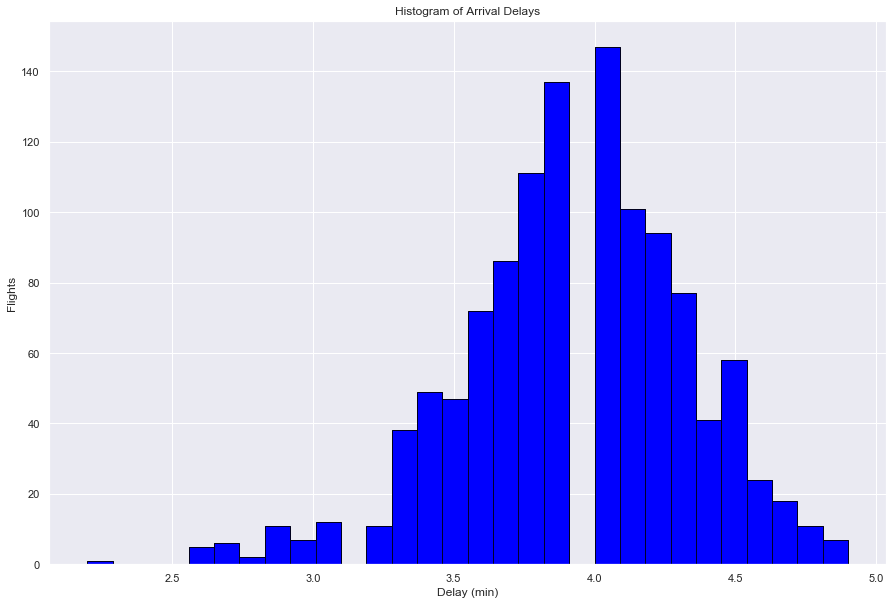

In [201]:
### Restaurant rating distibution
data = new_df['Rating'].dropna()
# matplotlib histogram
plt.figure(figsize=(15,10))
plt.hist(data, color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(data, hist=True, kde=False 
             , color = 'blue',
             bins = 30,
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In general, the rating distribution is not normal but in the highest score 4.0 has peak! We have to carefully see the condition of the highest rated restuarant

In [202]:
new_df[new_df['Rating'] >= 4.8]

,Cost_for_two,Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Competitors_in_Location,Score,location_latitude,location_longitude
3,1800.0,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",True,4.9,3275,Excellent,True,2,125.0,59.778427,18.996332,72.830860
4,1600.0,"Modern Indian, European, Pizza, Grill","Best of Mumbai, Food Hygiene Rated Restaurants...",False,1pm – 1am (Mon-Sun),Bandra West,JLWA,"Casual Dining,Bar",True,4.8,1989,Excellent,True,4,241.0,50.627941,19.058336,72.830267
7,3000.0,"Egyptian, Turkish, Lebanese, Moroccan, Greek",Best of Mumbai,False,"12noon – 1:30am (Mon-Sat),12noon – 4pm (Sun)",Cuffe Parade,Bayroute,Fine Dining,True,4.9,1037,Excellent,True,5,13.0,46.254406,18.913641,72.820930
13,1500.0,"North Indian, Mughlai, South Indian","Best of Mumbai, Food Hygiene Rated Restaurants...",False,"12:30pm – 3:30pm, 6:30pm – 11pm (Mon-Sun)",Powai,Mirchi And Mime,Casual Dining,True,4.9,5508,Excellent,False,3,134.0,73.272233,19.118720,72.907348
15,2200.0,"Finger Food, Pizza, Seafood","Best of Mumbai, Where's The Party?, Beer in a ...",False,"7pm – 3am (Mon, Tue, Fri, Sat, Sun), Closed (W...",Juhu,Yeda Republic,"Bar,Lounge",True,4.9,1922,Excellent,True,3,100.0,51.602377,19.107021,72.827528
19,1500.0,"Continental, Mediterranean, Italian","Where's The Party?, Popular Gold Restaurants, ...",False,"12midnight – 1:30am, 4pm – 12midnight (Mon-Sun)",Veera Desai Area,Tipsy Gypsy,"Bar,Casual Dining",True,4.8,2414,Excellent,False,3,36.0,53.196176,19.133824,72.835381
43,1800.0,"Salad, Continental, Healthy Food, Mediterranea...",Best of Mumbai,True,11am – 12midnight (Mon-Sun),Bandra Kurla Complex,Santé Spa Cuisine,Casual Dining,True,4.8,396,Excellent,False,5,38.0,41.001594,19.067115,72.865724
48,5000.0,"North Indian, South Indian",Best of Mumbai,False,"12noon – 2:30pm, 7pm – 11:30pm (Mon-Sun)",Bandra Kurla Complex,Masala Library,Fine Dining,True,4.8,3767,Excellent,False,2,38.0,61.372226,19.067115,72.865724
104,1500.0,"North Indian, Continental, Italian, Chinese",Best of Mumbai,False,6pm – 12midnight (Mon-Sun),Thane West,Warehouse Lounge,Lounge,True,4.9,458,Excellent,False,4,386.0,42.755565,19.175020,72.971802
114,1500.0,"Italian, European, Modern Indian, Asian, India...","Newly Opened, Food Hygiene Rated Restaurants I...",False,12noon – 1am (Mon-Sun),Thane West,Coco Mansion,"Casual Dining,Bar",True,4.8,221,Excellent,True,8,386.0,39.944086,19.175020,72.971802


As we can see from the above results that most of the high rated restaurants has International & North Indian cuisines in their menu, moreover we can see that all the higher rated restaurant has higher cost of food too. However location does not play much important role here.

## Price range and rating

In [203]:
# Now lets plot box plot based on the cost of food
bins = pd.IntervalIndex.from_tuples([(0, 500), (501, 1000), (1001, 2000), (2001, 3000), (3001, 4000), (4001, 5000), (5001, 6000)])
new_df['cost_cat'] = pd.cut(new_df['Cost_for_two'], bins)

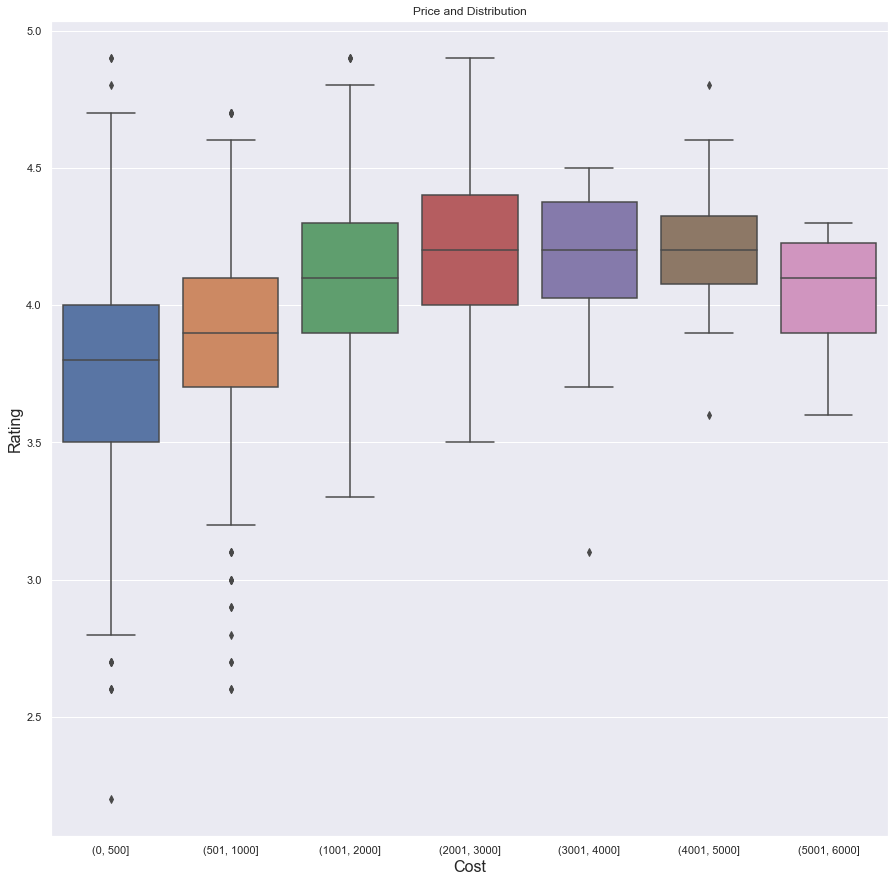

In [204]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="cost_cat", y="Rating", data=new_df)
ax.set_xlabel('Cost', fontsize=16)
ax.set_ylabel('Rating', fontsize=16)
ax.set_title('Price and Distribution')
plt.savefig("box.png")
new_df.drop('cost_cat', axis=1, inplace=True)



It can be seen that as the price increases the average rating of restaurants also increase. So can we say Price does affect rating of a restaurant? Not now, there may be some other factors too. lets find out


## **Cuisine**

#### Cuisine and rating of a restaurant

Does having more number of cuisine mean higher rating of the restaurant

In [205]:
def fun(x):
    if(type(x) == list):
        return (len(x))
    else:
        return 0
new_df['no_of_cuisine'] = new_df['Cuisines'].str.split(',').apply(fun)

In [206]:
new_df.groupby(['no_of_cuisine'])['Rating'].mean()

no_of_cuisine
1    3.849451
2    3.894158
3    3.911194
4    3.946193
5    4.020202
6    3.966000
7    3.944828
8    4.100000
Name: Rating, dtype: float64

In [207]:
new_df.drop('no_of_cuisine', axis=1, inplace=True)

Yes it can be seen that restaurants having more number of cuisines are rated higher

**So is there a particular cuisine in a restaurant that makes the restaurant rated higher**

In [208]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = new_df['Cuisines'].str.split(',').apply(func)

In [209]:
cui_df = new_df[['Restaurant_Name', 'Restaurant_Location', 'Rating', 'Cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['Restaurant_Name', 'Restaurant_Location', 'Rating', 'Cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['Restaurant_Name', 'Restaurant_Location', 'Rating', 'Cuisines'])].fillna(0)
cui_df

,Restaurant_Name,Restaurant_Location,Rating,Cuisines,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,...,Korean,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani
1,Joey's Pizza,Malad West,4.6,Pizza,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bastian,Bandra West,4.5,Seafood,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tamasha,Lower Parel,4.9,"Finger Food, Continental",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,JLWA,Bandra West,4.8,"Modern Indian, European, Pizza, Grill",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,HITCHKI,Bandra Kurla Complex,4.7,Modern Indian,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,YumYumSouth,Prabhadevi,3.7,"South Indian, Beverages",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1229,Lazeezo,Vashi,3.6,"Mughlai, Biryani, North Indian, Kebab",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1230,Ibrahim's,Malad West,2.2,"Mughlai, Lucknowi, Biryani",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1231,Foodiee Live,Chakala,3.2,"North Indian, Rolls",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
for i in range(1, len(cui_df)):
    for x in cuisine:
        if type(cui_df.loc[:, 'Cuisines']) == str and x in cui_df.loc[:, 'Cuisines']:
            cui_df.loc[i, x] = cui_df.loc[i, x]+1

In [230]:
def set_pandas_options() -> None:
    pd.options.display.max_columns = 20
    pd.options.display.max_rows = 75
    pd.options.display.max_colwidth = 199
    pd.options.display.width = None
    # pd.options.display.precision = 2  # set as needed

set_pandas_options()

In [231]:
cui_df.groupby('Rating').sum().tail(10).T

Rating,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
Steak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bengali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hyderabadi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Juices,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oriental,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Mangalorean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bohri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Goan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biryani,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Lets find out which neighborhood is famous for what type of cuisine**

In [232]:
# Now can we say whcih neighborhood is famous for what type of food or cuisine
cuisine_grouped = cui_df.groupby('Restaurant_Location').sum()
cuisine_grouped

,Rating,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,BBQ,Cantonese,Mithai,...,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani,rate_cat
Restaurant_Location,,,,,,,,,,,,,,,,,,,,,
4 Bungalows,44.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Airoli,70.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Andheri,12.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Andheri East,3.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Andheri West,364.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vile Parle East,61.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Vile Parle West,23.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Virar,33.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


**Lets print the top 5 cuisine famous in each of the neighborhood**

In [234]:
num_top_venues = 5
for hood in cuisine_grouped.index:
    print("----"+hood+"----")
    temp = cuisine_grouped[cuisine_grouped.index == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----4 Bungalows----
           venue  freq
0          Steak   0.0
1        Bengali   0.0
2       Bar Food   0.0
3  North Eastern   0.0
4     Vietnamese   0.0


----Airoli----
           venue  freq
0          Steak   0.0
1        Bengali   0.0
2       Bar Food   0.0
3  North Eastern   0.0
4     Vietnamese   0.0


----Andheri----
           venue  freq
0          Steak   0.0
1        Bengali   0.0
2       Bar Food   0.0
3  North Eastern   0.0
4     Vietnamese   0.0


----Andheri East----
           venue  freq
0          Steak   0.0
1        Bengali   0.0
2       Bar Food   0.0
3  North Eastern   0.0
4     Vietnamese   0.0


----Andheri West----
          venue  freq
0       Chinese   1.0
1        Indian   1.0
2  North Indian   1.0
3       Biryani   1.0
4     Mongolian   0.0


----Azad Nagar----
           venue  freq
0          Steak   0.0
1        Bengali   0.0
2       Bar Food   0.0
3  North Eastern   0.0
4     Vietnamese   0.0


----Bandra----
           venue  freq
0          Steak

### **Statistical Analysis**

In [241]:
import statsmodels.formula.api as smf

In [242]:
data = [
    go.Scatter(x = new_df['Cost_for_two'],
              y = new_df['Rating'],
              mode = "markers",
               text = new_df['Restaurant_Name'],
               marker = dict(opacity = 0.7,
                            size = 10,
                            color = new_df['Rating'], #Set color equalivant to rating
                            colorscale= 'Viridis',
                            showscale=True,
                             maxdisplayed=2500,
                            ),
                hoverinfo="text+x+y",
              )
]
layout = go.Layout(autosize=True,
                   xaxis=dict(title="Average Cost of Two (INR)",
                             #titlefont=dict(size=20,),
                             #tickmode="linear",
                             ),
                   yaxis=dict(title="Rating",
                             #titlefont=dict(size=17,),
                             ),
                  )
plotly.offline.plot(dict(data=data, layout=layout))

'temp-plot.html'

As it seems, from a quick glance, there is no obseravable linear relationship. At almost every price point, there appears to be both Good and Bad restaurants.

**Null Hypothesis** : There is no relationship between the rating and price of the restaurant

**Alternate Hypothesis** : There is some relationship between the two

In [243]:
pear = new_df.dropna(subset=['Cost_for_two', 'Rating'])

In [244]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(pear['Cost_for_two'], pear['Rating']) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  0.2268062259131467 and a P-value of: 3.771334182453177e-15


The p-values comes out to be much much lower than our signifiance level. Hence we reject our NULL hypothesis and accept the alternate hypothesis. And our finding can be said to be statistically significant. Therefore we can say that there is some relationship between the two.

### **Does more votes means Higher Ratings?**

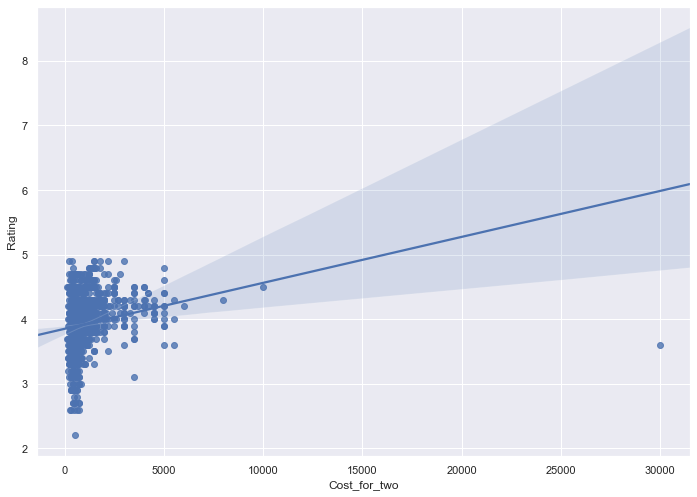

In [246]:
ax = sns.regplot(x=pear['Cost_for_two'], y=pear['Rating'], color="b")

As it seems, from a quick glance, there is no obseravable linear relationship. At almost every price point, there appears to be both low and high cost restaurants.

Let's see the statistical analysis

**Null Hypothesis** : There is no relationship between the rating and votes of the restaurant
    
**Alternate Hypothesis** : There is some relationship between the two

In [247]:
pear = new_df.dropna(subset=['Votes', 'Rating'])

In [248]:
pearson_coef, p_value = stats.pearsonr(pear['Votes'], pear['Rating']) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  0.4481341033447588 and a P-value of: 5.149782109217486e-59


The p-value shows result is significant. And hence we reject our NULL hypothesis and accept the Alternate Hypothesis i.e both the variables are related and our finding was statistically significant

### **Now Lets see the top venues of each areas of Mumbai**

We will check it using Foursquare API to check the restaurants which are more famous.

In [255]:
import requests
from pandas.io.json import json_normalize

In [256]:
CLIENT_ID = 'I3KVHRT2EC3QFBLOMZ4C1LIGOZ32YCALXO43QD23VPZ1RJLA'
CLIENT_SECRET = 'PJN1UADCXBRYTXPZJU3FNPL1R1GFULQBL1XHCGPB0KEMSM20' 
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 9999

In [257]:
# function to extract the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [258]:
neighborhood_lat_lon = new_df.groupby(['Restaurant_Location'])['location_latitude', 'location_longitude'].first()
neighborhood_lat_lon

C:\Users\Klsingh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,location_latitude,location_longitude
Restaurant_Location,,
4 Bungalows,18.938771,72.835335
Airoli,19.151749,72.974477
Andheri,19.119698,72.846420
Andheri East,19.115883,72.854202
Andheri West,19.117249,72.833968
...,...,...
Vile Parle East,19.096288,72.848380
Vile Parle West,19.103873,72.840290
Virar,19.467682,72.887997


In [259]:
column_names = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5']
# instantiate the dataframe
df = pd.DataFrame(columns=column_names)
df

,cat1,cat2,cat3,cat4,cat5


In [260]:
i=0
for lat, long in zip(neighborhood_lat_lon.location_latitude, neighborhood_lat_lon.location_longitude):
    latitude = lat
    longitude = long
    # define URL
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    # send GET request and get trending venues
    results = requests.get(url).json()
    items = results['response']['groups'][0]['items']
    
    dataframe = json_normalize(items) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean columns
    dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

    print(neighborhood_lat_lon.index[i], " : ",dataframe_filtered.head(5)['categories'])
    df.loc[neighborhood_lat_lon.index[i]] = dataframe_filtered.head(5)['categories'].tolist()
    i+=1

C:\Users\Klsingh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



4 Bungalows  :  0        Cricket Ground
1                  Café
2           Coffee Shop
3    Chinese Restaurant
4      Parsi Restaurant
Name: categories, dtype: object
Airoli  :  0       Ice Cream Shop
1    Indian Restaurant
2         Dessert Shop
3    Indian Restaurant
4           Playground
Name: categories, dtype: object
Andheri  :  0                 Bakery
1                Theater
2            Pizza Place
3     Seafood Restaurant
4    American Restaurant
Name: categories, dtype: object
Andheri East  :  0               Bakery
1                Hotel
2    Indian Restaurant
3              Theater
4           Restaurant
Name: categories, dtype: object
Andheri West  :  0                Bakery
1               Theater
2           Pizza Place
3    Seafood Restaurant
4                  Café
Name: categories, dtype: object
Azad Nagar  :  0                      Bakery
1                 Pizza Place
2         American Restaurant
3              Ice Cream Shop
4    Mediterranean Restaurant
Name: c

In [261]:
df

,cat1,cat2,cat3,cat4,cat5
4 Bungalows,Cricket Ground,Café,Coffee Shop,Chinese Restaurant,Parsi Restaurant
Airoli,Ice Cream Shop,Indian Restaurant,Dessert Shop,Indian Restaurant,Playground
Andheri,Bakery,Theater,Pizza Place,Seafood Restaurant,American Restaurant
Andheri East,Bakery,Hotel,Indian Restaurant,Theater,Restaurant
Andheri West,Bakery,Theater,Pizza Place,Seafood Restaurant,Café
...,...,...,...,...,...
Vile Parle East,Club House,Theater,Bakery,Hotel,Seafood Restaurant
Vile Parle West,Theater,Seafood Restaurant,Bakery,Club House,Hotel
Virar,Mountain,Restaurant,Dhaba,Gym,Indian Restaurant
Wadala,Café,Vegetarian / Vegan Restaurant,Indian Restaurant,Gaming Cafe,Bar


## **Cluster Neighborhoods**

### Clustering on the basis of cuisine

In [324]:
## Now lets cluster neighborhoods by their food style
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [325]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = new_df['Cuisines'].str.split(',').apply(func)
cui_df = new_df[['Restaurant_Name', 'Restaurant_Location', 'Rating', 'Cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['Restaurant_Name', 'Restaurant_Location', 'Rating', 'Cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['Restaurant_Name', 'Restaurant_Location', 'Rating', 'Cuisines'])].fillna(0)
cui_df

,Restaurant_Name,Restaurant_Location,Rating,Cuisines,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,...,Korean,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani
1,Joey's Pizza,Malad West,4.6,Pizza,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bastian,Bandra West,4.5,Seafood,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tamasha,Lower Parel,4.9,"Finger Food, Continental",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,JLWA,Bandra West,4.8,"Modern Indian, European, Pizza, Grill",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,HITCHKI,Bandra Kurla Complex,4.7,Modern Indian,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,YumYumSouth,Prabhadevi,3.7,"South Indian, Beverages",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1229,Lazeezo,Vashi,3.6,"Mughlai, Biryani, North Indian, Kebab",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1230,Ibrahim's,Malad West,2.2,"Mughlai, Lucknowi, Biryani",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1231,Foodiee Live,Chakala,3.2,"North Indian, Rolls",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
for i in range(0, len(cui_df)):
    for x in cuisine:
        if type(cui_df.loc[:, 'Cuisines']) == str and x in cui_df.loc[:, 'Cuisines']:
            cui_df.loc[i, x] = cui_df.loc[i, x]+1
cuisine_grouped = cui_df.groupby('Restaurant_Location').sum()
cuisine_grouped

,Rating,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,BBQ,Cantonese,Mithai,...,Korean,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani
Restaurant_Location,,,,,,,,,,,,,,,,,,,,,
4 Bungalows,44.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Airoli,70.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andheri,12.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andheri East,3.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andheri West,364.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vile Parle East,61.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vile Parle West,23.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Virar,33.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
# set number of clusters
kclusters = 3

mumbai_grouped_clustering = cuisine_grouped

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0])

In [328]:
cuisine_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [329]:
cuisine_grouped.groupby('Cluster Labels').get_group(0)

,Cluster Labels,Rating,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,BBQ,Cantonese,...,Korean,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani
Restaurant_Location,,,,,,,,,,,,,,,,,,,,,
4 Bungalows,0,44.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Airoli,0,70.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andheri,0,12.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andheri East,0,3.9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Azad Nagar,0,26.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vile Parle East,0,61.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vile Parle West,0,23.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Virar,0,33.9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
cuisine_grouped.groupby('Cluster Labels').get_group(1)

,Cluster Labels,Rating,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,BBQ,Cantonese,...,Korean,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani
Restaurant_Location,,,,,,,,,,,,,,,,,,,,,
Andheri West,1,364.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bandra West,1,269.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thane West,1,302.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [331]:
cuisine_grouped.groupby('Cluster Labels').get_group(2)

,Cluster Labels,Rating,Steak,Bengali,Hyderabadi,Juices,Oriental,Cafe,BBQ,Cantonese,...,Korean,Turkish,Kebab,Continental,Pakistani,International,Mangalorean,Bohri,Goan,Biryani
Restaurant_Location,,,,,,,,,,,,,,,,,,,,,
Borivali West,2,114.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chakala,2,111.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Colaba,2,111.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fort,2,127.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Juhu,2,160.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Khar,2,113.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kharghar,2,119.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lower Parel,2,152.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Malad West,2,152.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizing it on map

In [332]:
map_df = pd.merge(new_df[['Restaurant_Location','location_latitude', 'location_longitude']].groupby('Restaurant_Location').first(), cuisine_grouped, left_index=True, right_index=True)

In [333]:
venues_map = folium.Map(location=[19.076090, 72.877426], zoom_start=11) # generate map centred around Mumbai

states = folium.map.FeatureGroup()
labels = set(kmeans.labels_)
venues_map = folium.Map(location=[19.076090, 72.877426], zoom_start=11) # generate map centred around Mumbai

states = folium.map.FeatureGroup()
i=0
j=0
for label in labels:
    group = map_df.groupby('Cluster Labels').get_group(label)
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
            )
        )
        i+=1
    colors = ['blue', 'green', 'purple']
    
    x = group.index
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)
venues_map

On analysing the data it was found that North Indian, Indian, South Indian are available and famous in most(approx 90%) of the neighborhood of Mumbai. But among them the key observation are mentioned below. 

**Cluster 1** or those marked in Blue are the places that are more famous for its North Indian food, Chinese and Fast food and we can see that more number of restaurants are present.

**Cluster 2** or those marked in Green are those places that are more famous for its International, Indian, Chinese as well as fast food.

**Cluster 3** or those marked in Purple were those areas where Street Food, Chinese, Fast food are leaset popular.